# Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
data=pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Data Preprocessing

In [51]:
data.isnull()

,Position,Level,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [52]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


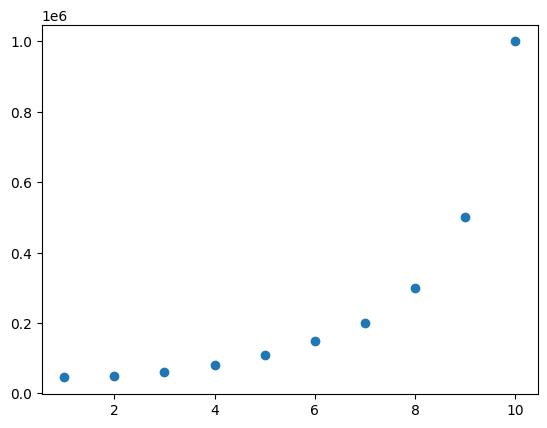

In [53]:
plt.scatter(data['Level'],data['Salary'])
plt.show()

In [54]:
x=data[['Level']]
y=data['Salary']

# Polynomial Algo


In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x= poly.fit_transform(x)
x

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

# Train_Test Split

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression Formula

In [57]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# Finding Accuracy

In [58]:
regressor.score(x_test,y_test)

0.9943664415853503

# Prediction

In [59]:
prd = regressor.predict(x)

# Visualization

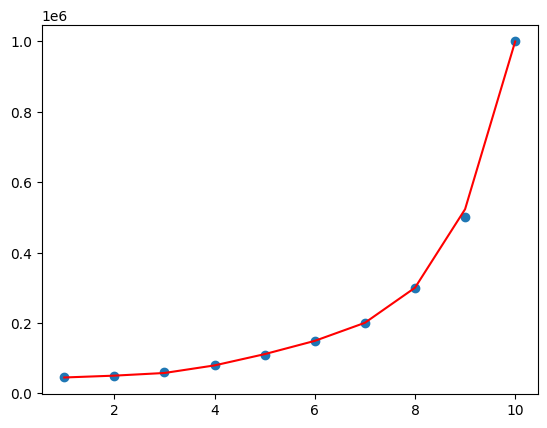

In [60]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],prd,c='red')
plt.show()

## Formual value Identification

In [61]:
## y = m1x1 + m2x2^2 + m3x3^3 + m4x4^4 +m5x5^5+ C  (using degree =5)

In [62]:
regressor.coef_

array([     0.        ,  86418.83009197, -58721.14364086,  18140.60002812,
        -2376.08668853,    116.26812592])

In [63]:
regressor.intercept_

1375.4158449159004

### For deployment first convert data to polynomial

In [64]:
test = poly.transform([[9]])
regressor.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([523241.47649002])